In [ ]:
!pip install --upgrade diffusers

In [ ]:
!pip install --upgrade transformers

In [4]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 15.1 MB/s eta 0:00:00


In [5]:
import torch
from PIL import Image
from io import BytesIO
import requests
from diffusers import StableDiffusionDepth2ImgPipeline
from matplotlib import pyplot as plt
import pandas as pd
import cv2

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
import os
os.chdir("/content/gdrive/My Drive/ComputerVision/")

In [8]:
# This part is when you are using GPU of Nvidia.
device = torch.device("cpu")
# If a GPU is available, set the device to GPU.
if torch.cuda.is_available:
  device = torch.device("cuda")
  print("GPU is available")
else:
  print("GPU is not available, CPU used")

GPU is available


In [9]:
# Creating a variable instance of the pipeline
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
# Assigning to GPU
pipe.to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

StableDiffusionDepth2ImgPipeline {
  "_class_name": "StableDiffusionDepth2ImgPipeline",
  "_diffusers_version": "0.18.2",
  "depth_estimator": [
    "transformers",
    "DPTForDepthEstimation"
  ],
  "feature_extractor": [
    "transformers",
    "DPTImageProcessor"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [12]:
config = pd.read_csv('config.csv')

In [23]:
def plot_multiple_images(row, nums_in_row, images, figsize=(5, 4)):
    # Create a figure and subplots with a row of images
    fig, axs = plt.subplots(row, nums_in_row, figsize=figsize)
    # Adjust spacing between subplots
    fig.subplots_adjust(hspace=0, wspace=0)
    if axs.ndim == 1: axs = axs.reshape((1,-1))
    capabilities = row * nums_in_row
    min_one = min(capabilities, len(images))
    for i in range(min_one):
        image = images[i]
        row = i // nums_in_row
        column = i % nums_in_row
        axs[row][column].imshow(image)
        axs[row][column].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

In [43]:
originals = []
synthetics = []


def apply_prompt(row, prompt, nprompt = '', orignals = None, generated = None):
  image_path = row['path']
  image = Image.open(image_path)
  image.resize((256, 256))
  if orignals is not None:
    orignals.append(image)
  images = pipe(prompt=prompt,negative_prompt=nprompt, image=image, strength=0.3).images
  if generated is not None:
    synthetics.append(images[0])
  return row

start = 0
end = 5
tmp = config.iloc[start:end].apply(apply_prompt, axis = 1, prompt = 'blue eyes', nprompt = 'noise, bad, deformed, ugly, blurry', orignals = originals, generated = synthetics)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

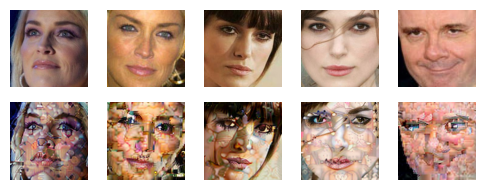

In [44]:
plot_multiple_images(2, end - start , originals + synthetics, figsize=(5, 2))